# 0. Imports

In [2]:
from dotenv import load_dotenv
import os
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit
from qiskit import transpile
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# 1. Configurações Iniciais

## 1.1. Carrega variáveis de ambiente

In [3]:
load_dotenv()
API_KEY = os.getenv('IBM_QUANTUM_API_KEY')
INSTANCE_CRN = os.getenv('IBM_QUANTUM_INSTANCE_CRN')

## 1.2. Configura conta da IBM Cloud com instância especificada

In [4]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=API_KEY,
    instance=INSTANCE_CRN, 
    overwrite=True,
    set_as_default=True
)

# 2. Códigos

## 2.1. Roda medição de um qubit aplicado a uma porta Hadamard

In [5]:
# 1. Inicializar serviço (assume que você já autenticou com save_account)
service = QiskitRuntimeService()

# 2. Selecionar o backend real menos ocupado
backend = service.least_busy(operational=True, simulator=False)

# 3. Criar circuito simples (e medir)
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

# 4. Transpilar para o backend
qc_isa = transpile(qc, backend=backend)

# 5. Criar Sampler informando o backend — usando o modo moderno:
sampler = Sampler(mode=backend)

# 6. Enviar o job (como lista de circuitos)
job = sampler.run([qc_isa], shots=1024)
print("Job ID:", job.job_id())
job_id = job.job_id()
print("Status:", job.status())

Job ID: d2h7jp83omtc738i96s0
Status: QUEUED


KeyboardInterrupt: 

Status: DONE
Counts: {'0': 505, '1': 519}
Counts: {'0': 505, '1': 519}


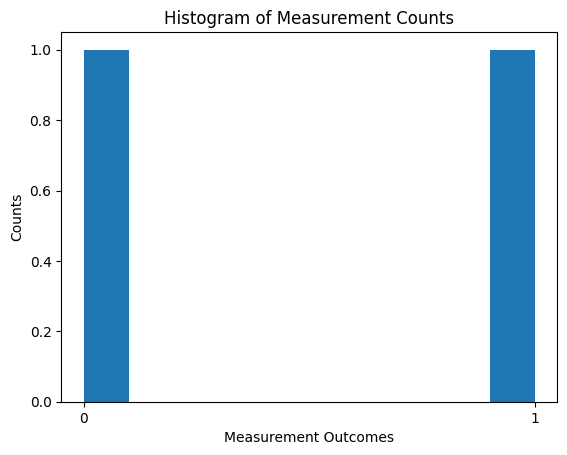

In [ ]:
job = service.job(job_id)
print("Status:", job.status())

if job.status() == "DONE":
    # 7. Capturar o resultado
    result = job.result()
    counts = result[0].data.meas.get_counts()

    # 8. Visualizar resultados
    print("Counts:", counts)
    plt.hist(counts)
    plt.title("Histogram of Measurement Counts")
    plt.xlabel("Measurement Outcomes")
    plt.ylabel("Counts")

    plt.show()

else:
    print("Job not completed")

## 2.2. Descobrindo número de qubits do backend utilizado

In [ ]:
backends = service.backends(simulator=False, operational=True)
for backend in backends:
    print(f"Backend: {backend.name},\tQubits: {backend.num_qubits},\tOperational: {backend.status().operational}")


Backend: ibm_brisbane,		Qubits: 127,	Operational: True
Backend: ibm_sherbrooke,		Qubits: 127,	Operational: True
Backend: ibm_torino,		Qubits: 133,	Operational: True


# 3. Referências

In [ ]:
print("https://quantum.cloud.ibm.com/instances")
print("https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/ibm-backend")